In [2]:
import pandas
import Bio
from Bio.Seq import Seq
print('pandas',pandas.__version__)
print('biopython',Bio.__version__)

pandas 1.3.4
biopython 1.79


In [3]:
# accession id : NC_002728 Nipah virus, complete genome

In [ ]:
## entrez search for nucleotide

In [4]:
from Bio import Entrez, SeqIO
Entrez.email = "" 
handle = Entrez.efetch(db="nucleotide", id="NC_002728", rettype="gb", retmode="text")
recs = list(SeqIO.parse(handle, 'gb'))
handle.close()

In [5]:
recs

[SeqRecord(seq=Seq('ACCAAACAAGGGAGAATATGGATACGTTAAAATATATAACGTATTTTTAAAACT...GGT'), id='NC_002728.1', name='NC_002728', description='Nipah virus, complete genome', dbxrefs=['Project:15443', 'BioProject:PRJNA485481'])]

In [6]:
nipah_dna = recs[0].seq

In [7]:
nipah_dna

Seq('ACCAAACAAGGGAGAATATGGATACGTTAAAATATATAACGTATTTTTAAAACT...GGT')

In [8]:
print(f'The genome of Nipah consists of {len(nipah_dna)} nucleotides.')

The genome of Nipah consists of 18246 nucleotides.


In [ ]:
## chemical and physical property of the nucleotide molecule

In [9]:
# molecular weight
from Bio.SeqUtils import molecular_weight
molecular_weight(nipah_dna)

5647061.569500455

In [10]:
# GC content - higher GC content implies more stable molecule due to G and C forming triple hydrogen bonds
from Bio.SeqUtils import GC
GC(nipah_dna)

38.16726953852899

## nucleotide distribution

In [11]:
count_nucleotides = {
    'A': nipah_dna.count('A'),
    'T': nipah_dna.count('T'),
    'C': nipah_dna.count('C'),
    'G': nipah_dna.count('G')
}

In [12]:
count_nucleotides

{'A': 6176, 'T': 5106, 'C': 3326, 'G': 3638}

In [ ]:
##plotting of nucleotides

Text(0.5, 1.0, 'Nucleotide Frequency')

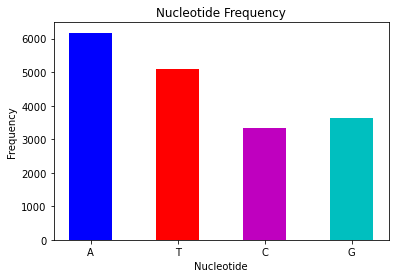

In [13]:
import matplotlib.pyplot as plt
width = 0.5
plt.bar(count_nucleotides.keys(), count_nucleotides.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequency')

In [ ]:
## transcription of dna

In [14]:
## nipah dna to mrna
nipah_mrna = nipah_dna.transcribe()
nipah_mrna

Seq('ACCAAACAAGGGAGAAUAUGGAUACGUUAAAAUAUAUAACGUAUUUUUAAAACU...GGU')

In [ ]:
## transaltion of mrna

In [15]:
## nipah mrna to amino acid
nipah_aa = nipah_mrna.translate()
nipah_aa

Seq('TKQGRIWIR*NI*RIFKT*EPRQTLLVLVLDPQEIYHHE*YL*RGG*F*ELSI*...LFG')

In [ ]:
## counting aminoacids in the total aminoacids coded by genome

In [16]:
#most common amino acids
from collections import Counter
common_amino = Counter(nipah_aa)
common_amino.most_common(10)

[('L', 720),
 ('S', 504),
 ('*', 483),
 ('I', 463),
 ('R', 382),
 ('T', 364),
 ('K', 359),
 ('Q', 322),
 ('N', 266),
 ('V', 245)]

In [ ]:
## amino acid distribution is plotted

Text(0.5, 1.0, 'Protein Sequence Frequency')

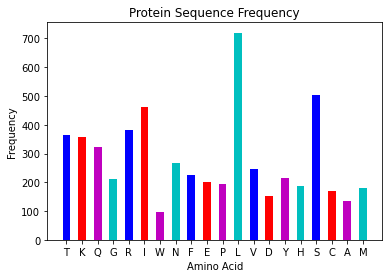

In [17]:
del common_amino['*']

width = 0.5
plt.bar(common_amino.keys(), common_amino.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Protein Sequence Frequency')

In [18]:
print(f"nipah's genome has {sum(common_amino.values())} amino acids")

nipah's genome has 5599 amino acids


In [ ]:
## splitting of amino acid chains

In [19]:
proteins = nipah_aa.split('*')
proteins[:5]

[Seq('TKQGRIWIR'),
 Seq('NI'),
 Seq('RIFKT'),
 Seq('EPRQTLLVLVLDPQEIYHHE'),
 Seq('YL')]

In [ ]:
## removing aminoacid chain which is less than 20 amino acid

In [20]:
for protein in proteins:
    if len(protein) < 20:
        proteins.remove(protein)

In [21]:
print(f'We have {len(proteins)} proteins with more than 20 amino acids in the covid-19 genome')

We have 271 proteins with more than 20 amino acids in the covid-19 genome


In [ ]:
##sorting protein based on length

In [22]:
top_5_proteins = sorted(proteins, key = len)

In [23]:
top_5_proteins

[Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq(''),
 Seq('N'),
 Seq('Y'),
 Seq('G'),
 Seq('I'),
 Seq('A'),
 Seq('Y'),
 Seq('G'),
 Seq('K'),
 Seq('Y'),
 Seq('R'),
 Seq('T'),
 Seq('I'),
 Seq('G'),
 Seq('L'),
 Seq('NI'),
 Seq('TP'),
 Seq('RC'),
 Seq('HL'),
 Seq('FF'),
 Seq('PV'),
 Seq('IL'),
 Seq('KT'),
 Seq('GI'),
 Seq('MY'),
 Seq('AK'),
 Seq('FI'),
 Seq('LI'),
 Seq('ML'),
 Seq('LC'),
 Seq('RGG'),
 Seq('PRH'),
 Seq('PSL'),
 Seq('STL'),
 Seq('LVT'),
 Seq('TIQ'),
 Seq('LVN'),
 Seq('FQP'),
 Seq('TRN'),
 Seq('EED'),
 Seq('KME'),
 Seq('EHY'),
 Seq('PEL'),
 Seq('YQI'),
 Seq('PTT'),
 Seq('TII'),
 Seq('MRM'),
 Seq('SQS'),
 Seq('REG'),
 Seq('VCI'),
 Seq('QLH'),
 Seq('RGN'),
 Seq('RRY'),
 Seq('YPR'),
 Seq('LKK'),
 Seq('ELSI'),
 Seq('FRQS'),
 Seq('EETF'),
 Seq('ACCL'),
 Seq('TKLL'),
 Seq('EYLM'),
 Seq('IYHL'),
 Seq('NIPI'),
 Seq('HYMRQ'),
 Seq('LQRGA'),

In [ ]:
# finding longest amino acid chain

In [24]:
len(top_5_proteins[-1])

167

In [25]:
top_5_proteins[-1]

Seq('SMMASILLTLFRRTKKKYRRHTDDQVFNNPASKIKQKPGKIFCSAPVENLNKLR...KLI')

In [ ]:
## writing this to a fasta file

In [26]:
with open("nipah_protein_seq.fasta", "w") as file:
    file.write(f">covid protein\n{top_5_proteins[-1]}")

In [ ]:
## using  blast to search the pdb database

In [27]:
from Bio.Blast import NCBIWWW

result_handle2 = NCBIWWW.qblast("blastp", "pdb", top_5_proteins[-1])
result_handle2

In [ ]:
## saving its result as xml file

In [28]:
with open('nipah_results.xml', 'w') as save_file:
    nipah_blast_results = result_handle2.read()
    save_file.write(nipah_blast_results)

In [30]:
from Bio.Blast import NCBIXML

blast_records = NCBIXML.parse('nipah_results.xml')
    
blast_records = list(blast_records)
blast_records


AttributeError: 'str' object has no attribute 'read'